# Data Setup

In [38]:
import json 
import networkx as nx

with open("./wikivital_mathematics.json") as f:
    data = json.load(f)
 
    print(data.keys())

print('edges: ', data['edges'])
print('weights: ', data['weights'])
print("topics: ", data['node_ids'])

# don't ask me why they structured the data backwards
topics = {value: key for key, value in data['node_ids'].items()} 

u, v = data['edges'][0]
w = data['weights'][0]
print("example edge")
print("from", topics[u], "--", w, "to ->", topics[v])


dict_keys(['edges', 'weights', 'node_ids', 'time_periods', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '

In [43]:
G = nx.DiGraph()
for edge, weight in zip(data['edges'], data['weights']):
    G.add_edge(edge[0], edge[1], weight=weight)

# Basic Network Metrics

In [ ]:
print('nodes', len(G.nodes))
print('edges', len(G.edges))
print('density', nx.density(G))

weak_components = nx.weakly_connected_components(G)
largest_weak_cc = max(weak_components, key=len)
print('largest weak cc', len(largest_weak_cc))

strong_components = nx.strongly_connected_components(G)
largest_strong_cc = max(strong_components, key=len)
print('largest strong cc', len(largest_strong_cc), largest_strong_cc)

print('avg path length', nx.average_shortest_path_length(G.subgraph(largest_strong_cc)))
# Knowledge graphs SHOULD be acyclic, so this makes sense

nodes 1068
edges 27079
density 0.023762763743071864
largest weak cc 1068
largest strong cc 1 {929}
avg path length 0


In [65]:
from matplotlib import pyplot as plt
import matplotlib


G_viz = G.copy().to_undirected() # For communities, we need undirected
communities = list(nx.algorithms.community.greedy_modularity_communities(G_viz)) # No need to be perfect on visualizations :)

comm_id = {}
for index, comm in enumerate(communities):
    for v in comm:
        comm_id[v] = index


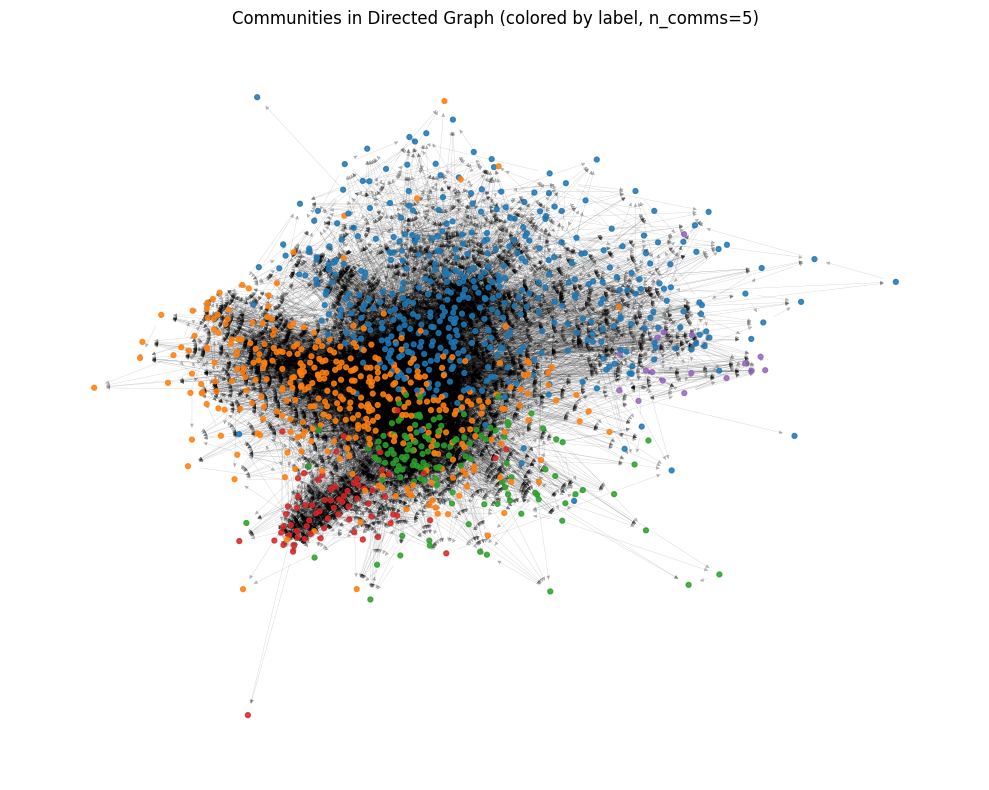

In [66]:

n_comms = max(comm_id.values()) + 1 if communities else 1

qualitative_maps = [
    "tab10", "Set3", "Accent", "Pastel1", "Dark2",
    "Paired", "tab20", "tab20b", "tab20c"
]
cmap_name = qualitative_maps[min(len(communities) // 10, len(qualitative_maps) - 1)]
cmap = matplotlib.colormaps[cmap_name]


node_colors = [cmap(comm_id.get(n, 0)) for n in G.nodes()]

pos = nx.spring_layout(G)



plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(
    G_viz, pos,
    node_size=12,           # small nodes for large graphs
    node_color=node_colors,
    alpha=0.85
)
nx.draw_networkx_edges(
    G_viz, pos,
    arrows=True,
    arrowstyle='-|>', arrowsize=6,
    width=0.2, alpha=0.25, edge_color='k'
)
# No labels for large graphs
# nx.draw_networkx_labels(G, pos, font_size=6)

plt.title(f"Communities in Directed Graph (colored by label, n_comms={n_comms})")
plt.axis('off')
plt.tight_layout()
plt.show()


In [67]:
# What are the big 5?
hubs = []
for comm in communities:
    hub = max(comm, key=lambda x: G.out_degree(x)) # type: ignore
    print(topics[hub], G.out_degree(hub))
    hubs.append(hub)

Mathematics 533
Real number 290
Calculus 197
Statistics 160
Prisoner's dilemma 19


Having the prisoner's dilemma be a hub seems a bit odd to me. Seems like it is
just an outlier in the community generation algorithm. It's out degree is 
significantly lower than the other hubs. 

Looking at the members of the community, it seems this should actually be under
the "Game theory" topic, but it seems that article got buried. More research
is needed.

In [64]:
for v in communities[4]:
    print(topics[v])

Prisoner's dilemma
Zero-sum game
Nash equilibrium
Repeated game
Common knowledge (logic)
Perfect information
Condorcet paradox
Stable marriage problem
Extensive-form game
Information set (game theory)
Strategy (game theory)
Normal-form game
Strategic dominance
Battle of the sexes (game theory)
Arrow's impossibility theorem
Monty Hall problem
Stable roommates problem


# Degree Analysis


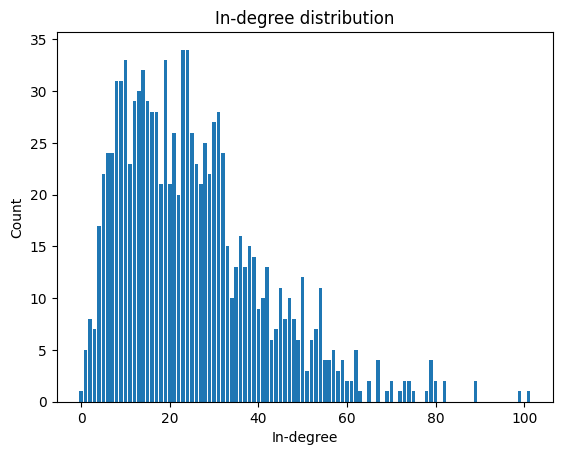

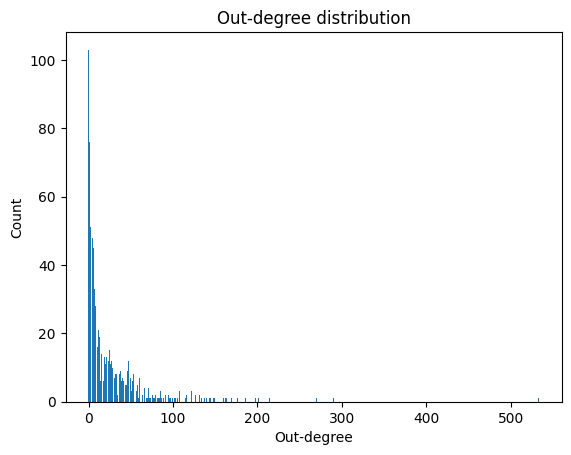

In [41]:
import matplotlib.pyplot as plt
# choose degree type (for DiGraph)
in_degrees = [d for _, d in G.in_degree()]
out_degrees = [d for _, d in G.out_degree()]

max_deg = max(max(in_degrees, default=0), max(out_degrees, default=0))
bins = range(max_deg + 2)

plt.figure()
plt.hist(in_degrees, bins=range(max(in_degrees)+2), align='left', rwidth=0.8)
plt.xlabel('In-degree')
plt.ylabel('Count')
plt.title('In-degree distribution')
plt.show()

plt.figure()
plt.hist(out_degrees, bins=range(max(out_degrees)+2), align='left', rwidth=0.8)
plt.xlabel('Out-degree')
plt.ylabel('Count')
plt.title('Out-degree distribution')
plt.show()

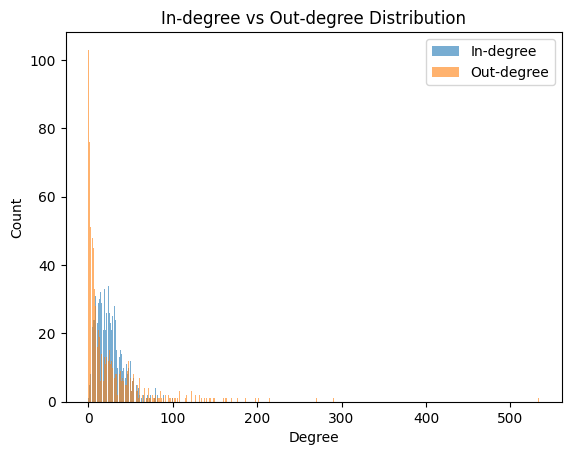

In [40]:

# plot histograms
# plot both on the same histogram
plt.hist(in_degrees, bins=bins, alpha=0.6, label='In-degree', color='tab:blue', rwidth=0.8)
plt.hist(out_degrees, bins=bins, alpha=0.6, label='Out-degree', color='tab:orange', rwidth=0.8)

plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('In-degree vs Out-degree Distribution')
plt.legend()
plt.show()

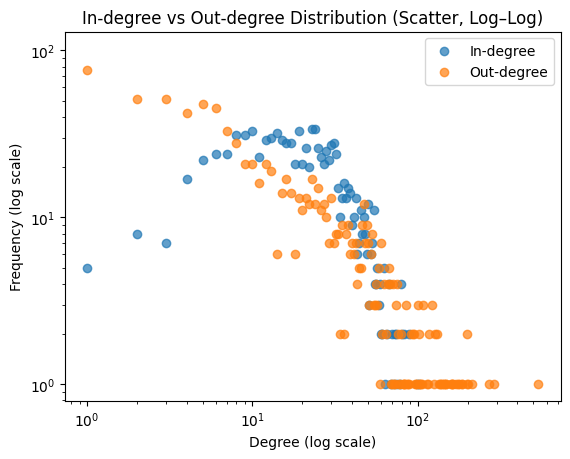

In [33]:
from typing import Counter

in_deg_counts = Counter(dict(G.in_degree).values())
out_deg_counts = Counter(dict(G.out_degree).values())

in_x, in_y = zip(*sorted(in_deg_counts.items()))
out_x, out_y = zip(*sorted(out_deg_counts.items()))

plt.figure()
plt.scatter(in_x, in_y, label='In-degree', color='tab:blue', alpha=0.7)
plt.scatter(out_x, out_y, label='Out-degree', color='tab:orange', alpha=0.7)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree (log scale)')
plt.ylabel('Frequency (log scale)')
plt.title('In-degree vs Out-degree Distribution (Scatter, Log–Log)')
plt.legend()
plt.show()

The indegrees follow a Poisson Distribution, while the outdegrees follow the expected "scale free" distribution.

This is because "broad topics" have many outward links, but there can only be so many broad topics.
On the other hand, having another topic like back to you is essentially random.